# Dataset Description
The dataset for this competition (both train and test) was generated from a deep learning model trained on the Kidney Stone Prediction based on Urine Analysis dataset. Feature distributions are close to, but not exactly the same, as the original. Feel free to use the original dataset as part of this competition, both to explore differences as well as to see whether incorporating the original in training improves model performance.



# Files
>train.csv - the training dataset; target is the likelihood of a kidney stone being present &&
>test.csv - the test dataset; your objective is to predict the probability of target

# Import Libraries

In [1]:
# linear algebra
import numpy as np 

# data processing
import pandas as pd 
import pandas_profiling as pp
from sklearn.preprocessing import MinMaxScaler

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

C:\Users\hp\AppData\Local\Temp\ipykernel_12572\3436005427.py:6: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling as pp


# Getting the Data

In [2]:
test_df = pd.read_csv("test.csv")
train_df = pd.read_csv("train.csv")

# Data Exploration/Analysis

In [3]:
test_df.head()

id  gravity    ph  osmo  cond  urea   calc
0  414    1.017  5.24   345  11.5   152   1.16
1  415    1.020  5.68   874  29.0   385   3.46
2  416    1.024  5.36   698  19.5   354  13.00
3  417    1.020  5.33   668  25.3   252   3.46
4  418    1.011  5.87   567  29.0   457   2.36

In [4]:
test_df.shape

(276, 7)

In [5]:
train_df.head()

id  gravity    ph  osmo  cond  urea  calc  target
0   0    1.013  6.19   443  14.8   124  1.45       0
1   1    1.025  5.40   703  23.6   394  4.18       0
2   2    1.009  6.13   371  24.5   159  9.04       0
3   3    1.021  4.91   442  20.8   398  6.63       1
4   4    1.021  5.53   874  17.8   385  2.21       1

In [6]:
train_df.drop_duplicates(subset = list(train_df)[0:-1], inplace = True, keep = 'first')

In [7]:
train_df.shape

(414, 8)

In [8]:
train_df.shape

(414, 8)

In [9]:
train_df['target'].value_counts()

0    230
1    184
Name: target, dtype: int64

In [10]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       414 non-null    int64  
 1   gravity  414 non-null    float64
 2   ph       414 non-null    float64
 3   osmo     414 non-null    int64  
 4   cond     414 non-null    float64
 5   urea     414 non-null    int64  
 6   calc     414 non-null    float64
 7   target   414 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 29.1 KB


In [11]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276 entries, 0 to 275
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       276 non-null    int64  
 1   gravity  276 non-null    float64
 2   ph       276 non-null    float64
 3   osmo     276 non-null    int64  
 4   cond     276 non-null    float64
 5   urea     276 non-null    int64  
 6   calc     276 non-null    float64
dtypes: float64(4), int64(3)
memory usage: 15.2 KB


In [12]:
train_df.describe()

id     gravity          ph         osmo        cond  \
count  414.000000  414.000000  414.000000   414.000000  414.000000   
mean   206.500000    1.017894    5.955459   651.545894   21.437923   
std    119.655756    0.006675    0.642260   234.676567    7.514750   
min      0.000000    1.005000    4.760000   187.000000    5.100000   
25%    103.250000    1.012000    5.530000   455.250000   15.500000   
50%    206.500000    1.018000    5.740000   679.500000   22.200000   
75%    309.750000    1.022000    6.280000   840.000000   27.600000   
max    413.000000    1.040000    7.940000  1236.000000   38.000000   

             urea        calc      target  
count  414.000000  414.000000  414.000000  
mean   278.657005    4.114638    0.444444  
std    136.442249    3.217641    0.497505  
min     10.000000    0.170000    0.000000  
25%    170.000000    1.450000    0.000000  
50%    277.000000    3.130000    0.000000  
75%    385.000000    6.630000    1.000000  
max    620.000000   14.340000    1.000000

In [13]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276 entries, 0 to 275
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       276 non-null    int64  
 1   gravity  276 non-null    float64
 2   ph       276 non-null    float64
 3   osmo     276 non-null    int64  
 4   cond     276 non-null    float64
 5   urea     276 non-null    int64  
 6   calc     276 non-null    float64
dtypes: float64(4), int64(3)
memory usage: 15.2 KB


In [14]:
def null(x):
    total = x.isnull().sum().sort_values(ascending=False)
    percent_1 = x.isnull().sum() / x.isnull().count() * 100
    percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
    missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
    print(missing_data.head(5))


In [15]:
null(train_df)

         Total    %
id           0  0.0
gravity      0  0.0
ph           0  0.0
osmo         0  0.0
cond         0  0.0


In [16]:
null(test_df)

         Total    %
id           0  0.0
gravity      0  0.0
ph           0  0.0
osmo         0  0.0
cond         0  0.0


In [17]:
train_df.dtypes

id           int64
gravity    float64
ph         float64
osmo         int64
cond       float64
urea         int64
calc       float64
target       int64
dtype: object

In [18]:
train_df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
409    False
410    False
411    False
412    False
413    False
Length: 414, dtype: bool

In [19]:
train_df.duplicated().sum()

0

In [20]:
train_df.drop(['id'],axis=1,inplace=True)

In [21]:
train_df.columns

Index(['gravity', 'ph', 'osmo', 'cond', 'urea', 'calc', 'target'], dtype='object')

In [22]:
test_df.columns

Index(['id', 'gravity', 'ph', 'osmo', 'cond', 'urea', 'calc'], dtype='object')

FOR TRAIN DATA

In [23]:
pp.ProfileReport(train_df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

FOR TEST DATA

In [24]:
pp.ProfileReport(test_df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

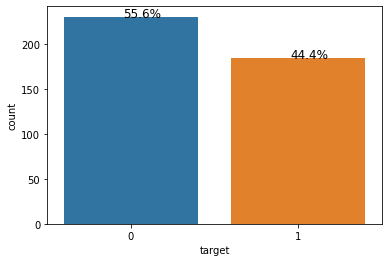

In [25]:
target = sns.countplot(x='target', data=train_df)
total = len(train_df['target'])
for p in target.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2 - 0.05
    y = p.get_y() + p.get_height()
    target.annotate(percentage, (x, y), size = 12)
plt.show()


<Figure size 720x576 with 0 Axes>

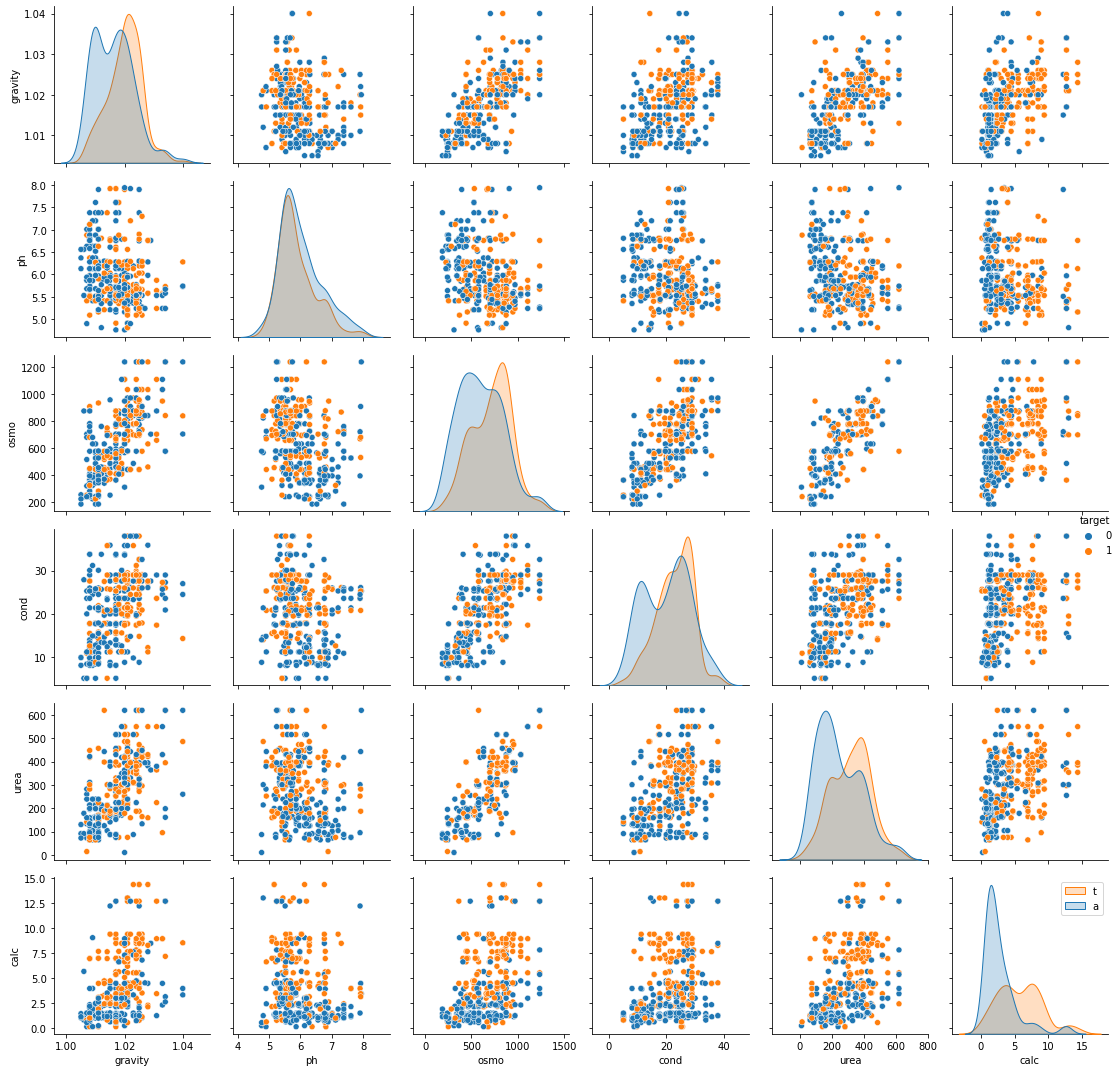

In [26]:
plt.figure(figsize=(10,8))
sns.pairplot(train_df,hue="target")
plt.legend("target")
plt.tight_layout()
plt.plot()
plt.show()

<Figure size 864x720 with 0 Axes>

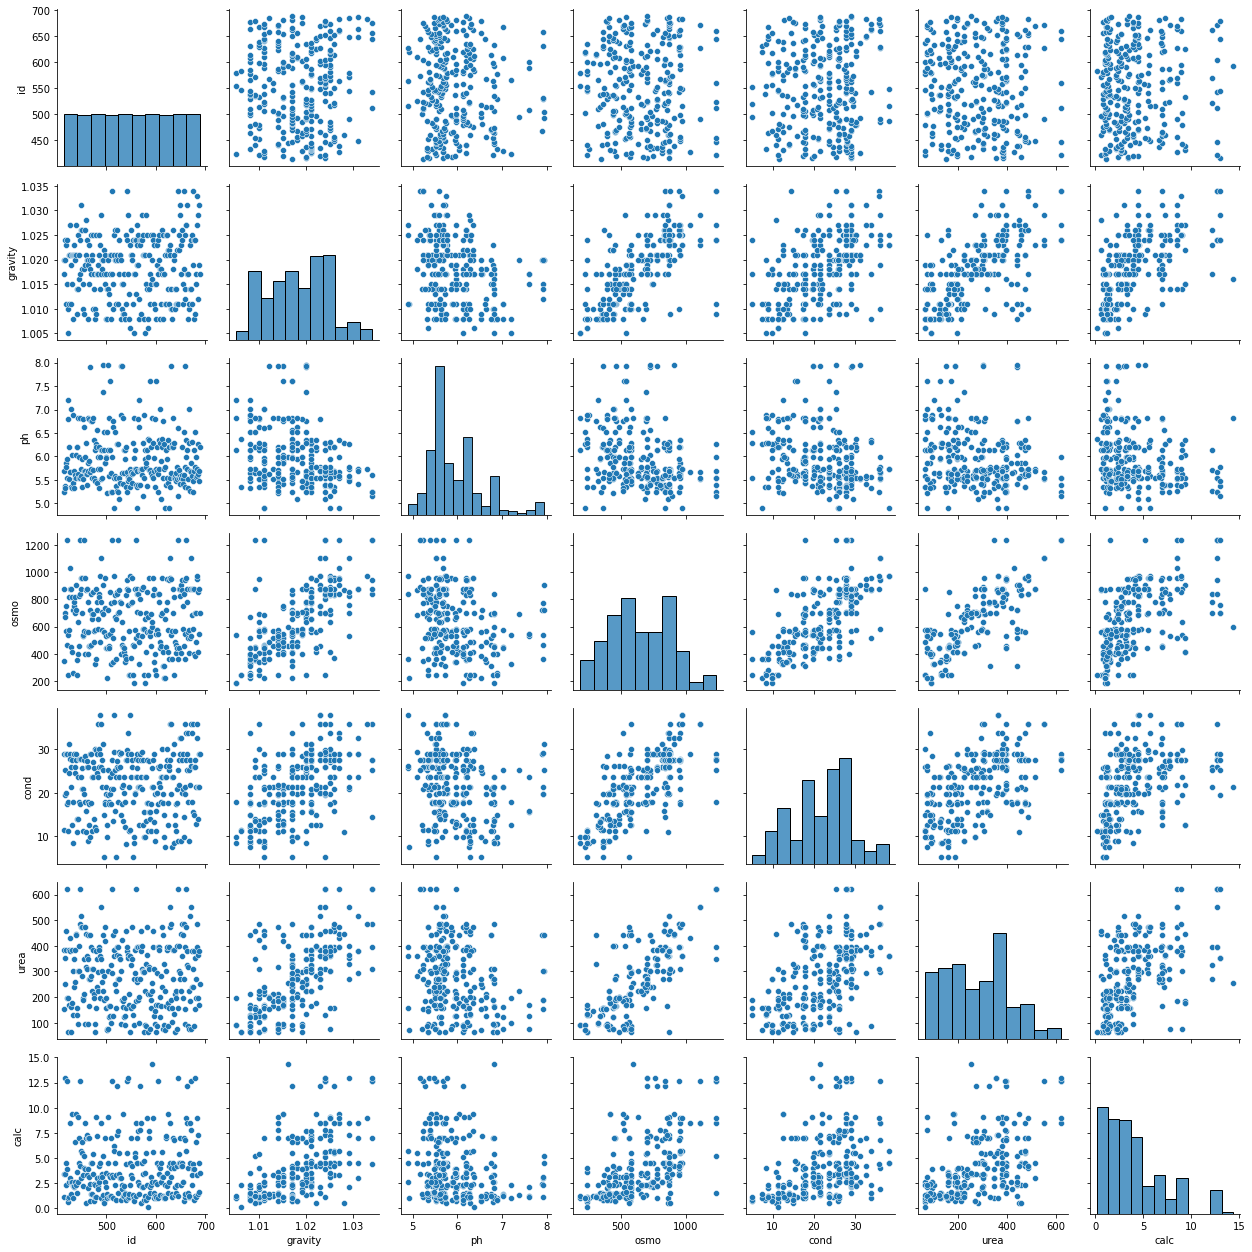

In [27]:
plt.figure(figsize=(12,10))
sns.pairplot(test_df)
plt.tight_layout()
plt.plot()
plt.show()

FOR TRAIN DATA

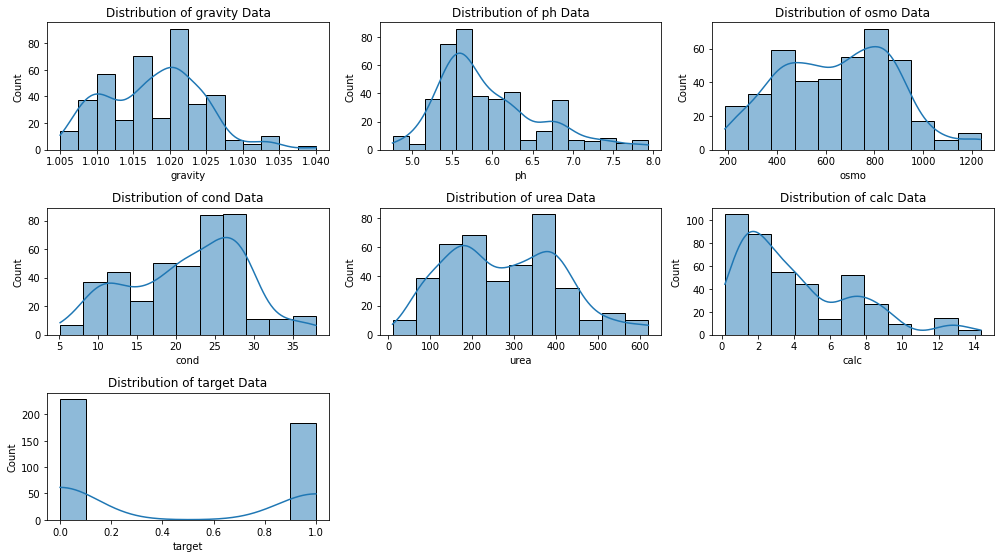

In [28]:
plt.figure(figsize=(14,10))
plt.title("Distribution of feature Data in the Train Dataset")
for i,col in enumerate(train_df.columns,1):
    plt.subplot(4,3,i)
    plt.title(f"Distribution of {col} Data")
    sns.histplot(train_df[col],kde=True)
    plt.tight_layout()
    plt.plot()
plt.show()

FOR TEST DATA

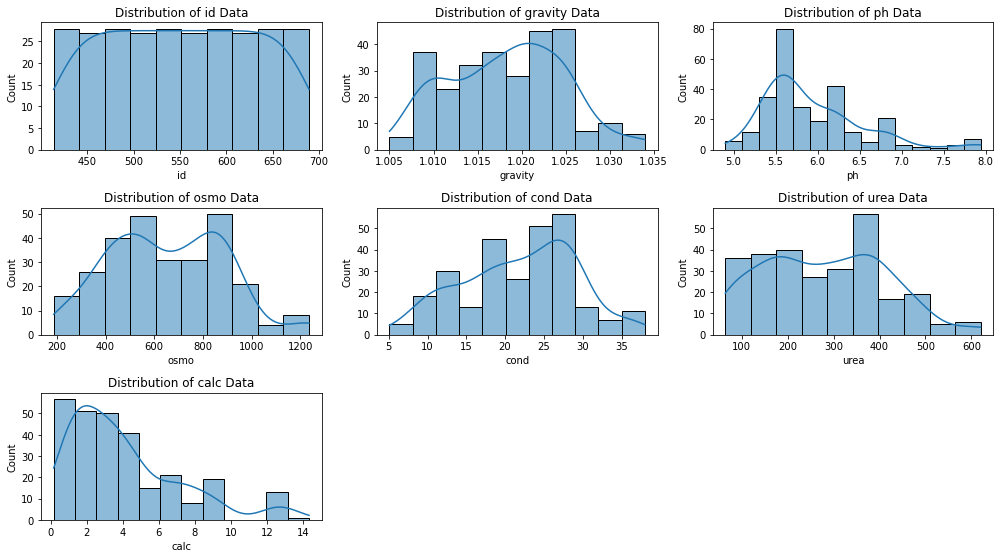

In [29]:
plt.figure(figsize=(14,10))
plt.title("Distribution of feature Data in the Train Dataset")
for i,col in enumerate(test_df.columns,1):
    plt.subplot(4,3,i)
    plt.title(f"Distribution of {col} Data")
    sns.histplot(test_df[col],kde=True)
    plt.tight_layout()
    plt.plot()
plt.show()

# Box plot
In IQR(q1 -q3) the  "solid line" indicates "MEDIAN" and the "dashed line" indicates "MEAN"

FOR TRAIN DATA

Text(0, 0.5, 'count')

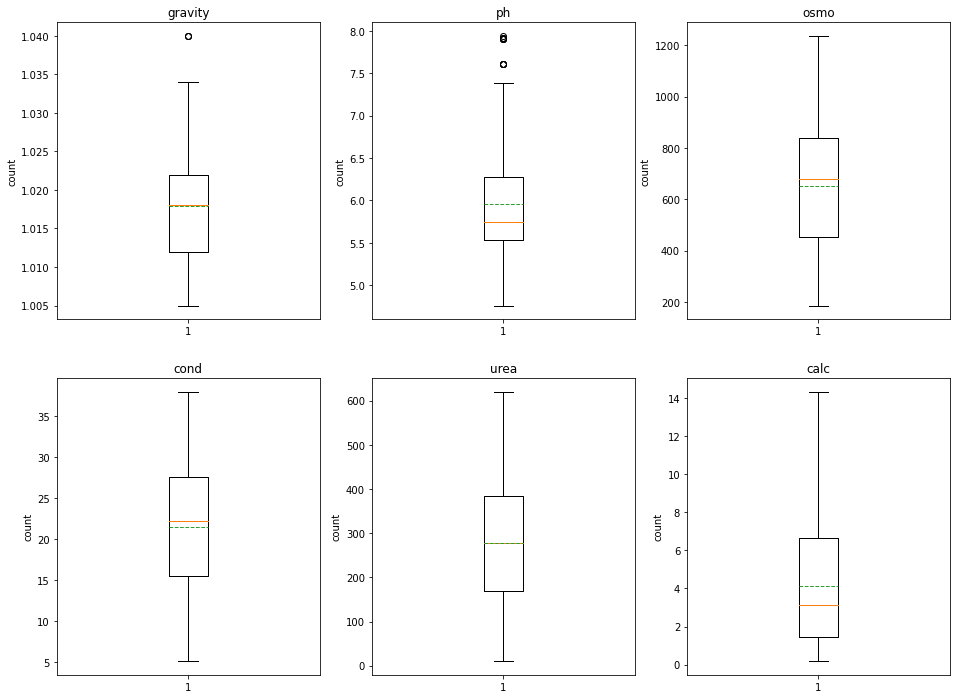

In [30]:
#graph distribution of quantitative data or numerical variables
plt.figure(figsize=[16,12])
plt.subplot(231)
plt.boxplot(x=train_df['gravity'], showmeans = True, meanline = True)
plt.title('gravity')
plt.ylabel('count')
#graph distribution of quantitative data or numerical variables
plt.subplot(232)
plt.boxplot(x=train_df['ph'], showmeans = True, meanline = True)
plt.title('ph')
plt.ylabel('count')
#graph distribution of quantitative data or numerical variables
plt.subplot(233)
plt.boxplot(x=train_df['osmo'], showmeans = True, meanline = True)
plt.title('osmo')
plt.ylabel('count')
#graph distribution of quantitative data or numerical variables
plt.subplot(234)
plt.boxplot(x=train_df['cond'], showmeans = True, meanline = True)
plt.title('cond')
plt.ylabel('count')
#graph distribution of quantitative data or numerical variables
plt.subplot(235)
plt.boxplot(x=train_df['urea'], showmeans = True, meanline = True)
plt.title('urea')
plt.ylabel('count')
#graph distribution of quantitative data or numerical variables
plt.subplot(236)
plt.boxplot(x=train_df['calc'], showmeans = True, meanline = True)
plt.title('calc')
plt.ylabel('count')


In [31]:
# Define a threshold value for outliers
threshold = 1.5

# Loop over each column in the dataset
for col in train_df.columns:
    # Calculate the interquartile range (IQR) for the current column
    Q1 = train_df[col].quantile(0.25)
    Q3 = train_df[col].quantile(0.75)
    IQR = Q3 - Q1

    # Find the indices of the outliers for the current column
    outlier_indices = train_df.index[(train_df[col] < Q1 - threshold * IQR) | (train_df[col] > Q3 + threshold * IQR)]

    # Replace the outlier values with NaNs for the current column
    train_df.loc[outlier_indices, col] = float('nan')

# Remove any rows that contain at least one NaN value
clean_data = train_df.dropna()

print("Original train_scaled: ")
print(train_df)
print()
print("Cleaned train_scaled: ")
print(clean_data)

Original train_scaled: 
     gravity    ph   osmo  cond   urea  calc  target
0      1.013  6.19  443.0  14.8  124.0  1.45     0.0
1      1.025  5.40  703.0  23.6  394.0  4.18     0.0
2      1.009  6.13  371.0  24.5  159.0  9.04     0.0
3      1.021  4.91  442.0  20.8  398.0  6.63     1.0
4      1.021  5.53  874.0  17.8  385.0  2.21     1.0
..       ...   ...    ...   ...    ...   ...     ...
409    1.011  5.21  527.0  21.4   75.0  1.53     0.0
410    1.024  5.53  577.0  19.7  224.0  0.77     0.0
411    1.018  6.28  455.0  22.2  270.0  7.68     1.0
412    1.008  7.12  325.0  12.6   75.0  1.03     1.0
413    1.011  6.13  364.0   9.9  159.0  0.27     0.0

[414 rows x 7 columns]

Cleaned train_scaled: 
     gravity    ph   osmo  cond   urea  calc  target
0      1.013  6.19  443.0  14.8  124.0  1.45     0.0
1      1.025  5.40  703.0  23.6  394.0  4.18     0.0
2      1.009  6.13  371.0  24.5  159.0  9.04     0.0
3      1.021  4.91  442.0  20.8  398.0  6.63     1.0
4      1.021  5.53  874.0  

# Re - Checking for outliers

Text(0, 0.5, 'count')

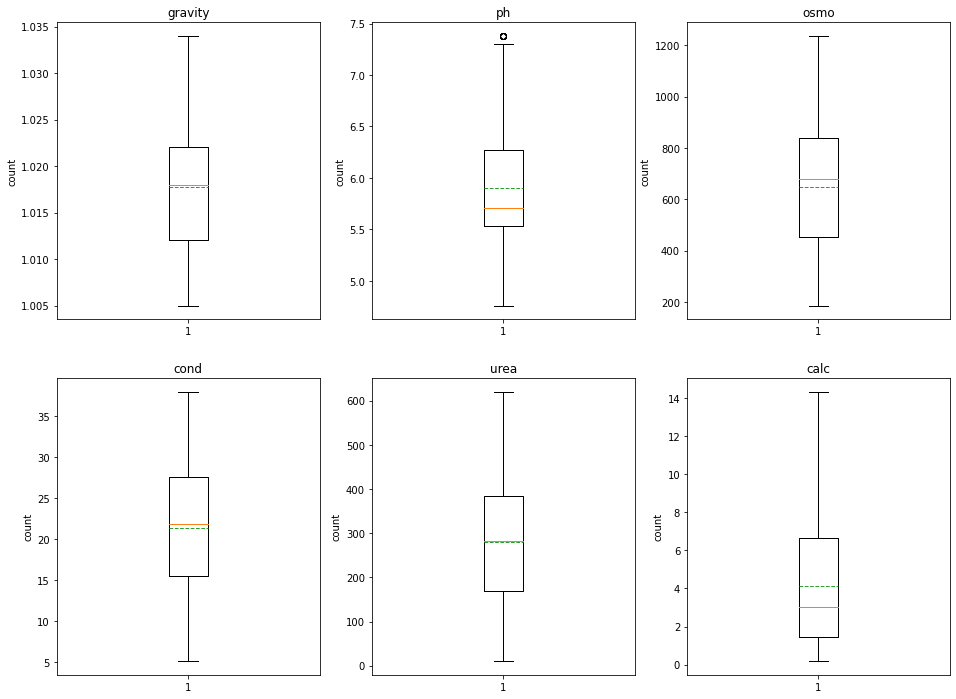

In [32]:
#graph distribution of quantitative data or numerical variables
plt.figure(figsize=[16,12])
plt.subplot(231)
plt.boxplot(x=clean_data['gravity'], showmeans = True, meanline = True)
plt.title('gravity')
plt.ylabel('count')
#graph distribution of quantitative data or numerical variables
plt.subplot(232)
plt.boxplot(x=clean_data['ph'], showmeans = True, meanline = True)
plt.title('ph')
plt.ylabel('count')
#graph distribution of quantitative data or numerical variables
plt.subplot(233)
plt.boxplot(x=clean_data['osmo'], showmeans = True, meanline = True)
plt.title('osmo')
plt.ylabel('count')
#graph distribution of quantitative data or numerical variables
plt.subplot(234)
plt.boxplot(x=clean_data['cond'], showmeans = True, meanline = True)
plt.title('cond')
plt.ylabel('count')
#graph distribution of quantitative data or numerical variables
plt.subplot(235)
plt.boxplot(x=clean_data['urea'], showmeans = True, meanline = True)
plt.title('urea')
plt.ylabel('count')
#graph distribution of quantitative data or numerical variables
plt.subplot(236)
plt.boxplot(x=clean_data['calc'], showmeans = True, meanline = True)
plt.title('calc')
plt.ylabel('count')


In [33]:
# split data into X and y

x = clean_data.drop(['target'], axis=1)
y = clean_data['target'] 

In [34]:
x.shape, y.shape

((399, 6), (399,))

FOR TRAIN DATA

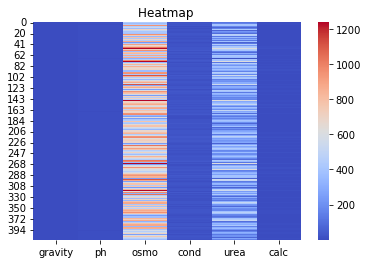

In [35]:
# Create a heatmap of the matrix
sns.heatmap(x, cmap='coolwarm')



# Add a title
plt.title('Heatmap ')

# Show the plot
plt.show()


In [36]:
# Threshold for removing correlated variables
threshold = 0.9

def highlight(value):
    if value > threshold:
        style = 'background-color: pink'
    else:
        style = 'background-color: palegreen'
    return style

# Absolute value correlation matrix
corr_matrix = x.corr().abs().round(2)
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper.style.format("{:.2f}").applymap(highlight)

C:\Users\hp\AppData\Local\Temp\ipykernel_12572\963565082.py:13: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


In [37]:
# Select columns with correlations above threshold
collinear_features = [column for column in upper.columns if any(upper[column] > threshold)]
df_train = x.drop(columns = collinear_features)
print('The number of features that passed the collinearity threshold: ', df_train.shape[1])


The number of features that passed the collinearity threshold:  6


In [38]:
x.shape

(399, 6)

FOR TRAIN DATA


In [39]:
scaler_train=MinMaxScaler(feature_range=(0,1))
X=scaler_train.fit_transform(x)

In [40]:
X

array([[0.27586207, 0.54580153, 0.24404194, 0.29483283, 0.18688525,
        0.09033169],
       [0.68965517, 0.24427481, 0.49189704, 0.56231003, 0.6295082 ,
        0.28299224],
       [0.13793103, 0.52290076, 0.17540515, 0.58966565, 0.2442623 ,
        0.62597036],
       ...,
       [0.44827586, 0.58015267, 0.25548141, 0.51975684, 0.42622951,
        0.52999294],
       [0.10344828, 0.90076336, 0.13155386, 0.22796353, 0.10655738,
        0.0606916 ],
       [0.20689655, 0.52290076, 0.16873213, 0.14589666, 0.2442623 ,
        0.00705716]])

In [41]:
y.dtypes

dtype('float64')

In [42]:
Y=y.astype('category')

In [43]:
Y.dtype

CategoricalDtype(categories=[0.0, 1.0], ordered=False)

In [44]:
Y.shape

(399,)

In [45]:
# Split the train_data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(319, 6) (319,) (80, 6) (80,)


In [47]:
def evaluate_model(act, pred):
    from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score
    print("Confusion Matrix \n", confusion_matrix(act, pred))
    print("Accurcay : ", accuracy_score(act, pred))
    print("Recall   : ", recall_score(act, pred))
    print("Precision: ", precision_score(act, pred))  

In [48]:
from sklearn.ensemble import RandomForestClassifier
clf1 = RandomForestClassifier()
clf1.fit(x_train, y_train)

train_pred = clf1.predict(x_train)
test_pred = clf1.predict(x_test)

print("--Train--")
evaluate_model(y_train, train_pred)
print("--Test--")
evaluate_model(y_test, test_pred)

--Train--
Confusion Matrix 
 [[173   0]
 [  0 146]]
Accurcay :  1.0
Recall   :  1.0
Precision:  1.0
--Test--
Confusion Matrix 
 [[41  6]
 [ 9 24]]
Accurcay :  0.8125
Recall   :  0.7272727272727273
Precision:  0.8


In [49]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

train_pred_l= logreg.predict(x_train)
test_pred_l= logreg.predict(x_test)

print("--Train--")
evaluate_model(y_train, train_pred_l)
print("--Test--")
evaluate_model(y_test, test_pred_l)



--Train--
Confusion Matrix 
 [[142  31]
 [ 56  90]]
Accurcay :  0.7272727272727273
Recall   :  0.6164383561643836
Precision:  0.743801652892562
--Test--
Confusion Matrix 
 [[43  4]
 [10 23]]
Accurcay :  0.825
Recall   :  0.696969696969697
Precision:  0.8518518518518519


In [50]:
# KNN
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train, y_train)

train_pred_k= logreg.predict(x_train)
test_pred_k= logreg.predict(x_test)

print("--Train--")
evaluate_model(y_train, train_pred_k)
print("--Test--")
evaluate_model(y_test, test_pred_k)


--Train--
Confusion Matrix 
 [[142  31]
 [ 56  90]]
Accurcay :  0.7272727272727273
Recall   :  0.6164383561643836
Precision:  0.743801652892562
--Test--
Confusion Matrix 
 [[43  4]
 [10 23]]
Accurcay :  0.825
Recall   :  0.696969696969697
Precision:  0.8518518518518519


In [51]:
# Gaussian Naive Bayes
gaussian = GaussianNB()
gaussian.fit(x_train, y_train)

train_pred_g= logreg.predict(x_train)
test_pred_g= logreg.predict(x_test)

print("--Train--")
evaluate_model(y_train, train_pred_g)
print("--Test--")
evaluate_model(y_test, test_pred_g)

--Train--
Confusion Matrix 
 [[142  31]
 [ 56  90]]
Accurcay :  0.7272727272727273
Recall   :  0.6164383561643836
Precision:  0.743801652892562
--Test--
Confusion Matrix 
 [[43  4]
 [10 23]]
Accurcay :  0.825
Recall   :  0.696969696969697
Precision:  0.8518518518518519


In [52]:
param_grid = {"n_estimators" : [50, 100],
              "max_depth" : [3,5],
              "max_features" : [4, 6],
              "min_samples_leaf" : [1, 2, 4]}

In [53]:
clf3 = RandomForestClassifier()
from sklearn.model_selection import GridSearchCV
clf_grid = GridSearchCV(clf3, param_grid, cv=2)

clf_grid.fit(x_train, y_train)

train_pred_hp = clf_grid.predict(x_train)
test_pred_hp = clf_grid.predict(x_test)

In [54]:
print("--Train--")
evaluate_model(y_train, train_pred_hp)
print("--Test--")
evaluate_model(y_test, test_pred_hp)

--Train--
Confusion Matrix 
 [[146  27]
 [ 42 104]]
Accurcay :  0.7836990595611285
Recall   :  0.7123287671232876
Precision:  0.7938931297709924
--Test--
Confusion Matrix 
 [[42  5]
 [ 7 26]]
Accurcay :  0.85
Recall   :  0.7878787878787878
Precision:  0.8387096774193549


In [55]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()
ada.fit(x_train, y_train)

AdaBoostClassifier()

In [56]:
train_pred_ada = ada.predict(x_train)
test_pred_ada = ada.predict(x_test)

In [57]:
print("--Train--")
evaluate_model(y_train, train_pred_ada)
print("--Test--")
evaluate_model(y_test, test_pred_ada)

--Train--
Confusion Matrix 
 [[139  34]
 [ 30 116]]
Accurcay :  0.799373040752351
Recall   :  0.7945205479452054
Precision:  0.7733333333333333
--Test--
Confusion Matrix 
 [[38  9]
 [ 6 27]]
Accurcay :  0.8125
Recall   :  0.8181818181818182
Precision:  0.75


In [58]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(x_train, y_train)

GradientBoostingClassifier()

In [59]:
train_pred_gbc = gbc.predict(x_train)
test_pred_gbc = gbc.predict(x_test)

In [60]:
print("--Train--")
evaluate_model(y_train, train_pred)
print("--Test--")
evaluate_model(y_test, test_pred)

--Train--
Confusion Matrix 
 [[173   0]
 [  0 146]]
Accurcay :  1.0
Recall   :  1.0
Precision:  1.0
--Test--
Confusion Matrix 
 [[41  6]
 [ 9 24]]
Accurcay :  0.8125
Recall   :  0.7272727272727273
Precision:  0.8


In [61]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [62]:
train_pred_xgb = xgb.predict(x_train)
test_pred_xgb = xgb.predict(x_test)

In [63]:
print("--Train--")
evaluate_model(y_train, train_pred_xgb)
print("--Test--")
evaluate_model(y_test, test_pred_xgb)

--Train--
Confusion Matrix 
 [[173   0]
 [  0 146]]
Accurcay :  1.0
Recall   :  1.0
Precision:  1.0
--Test--
Confusion Matrix 
 [[36 11]
 [ 5 28]]
Accurcay :  0.8
Recall   :  0.8484848484848485
Precision:  0.717948717948718


In [64]:
from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(estimators = [('XGBoost',xgb),('GradientBoost',gbc),('Adaboost',ada),('LogisticRegression',logreg),('GaussianNB',gaussian),('KNeighborsClassifier',knn),('RandomForest',clf3)])


In [65]:
voting_clf

VotingClassifier(estimators=[('XGBoost',
                              XGBClassifier(base_score=0.5, booster='gbtree',
                                            callbacks=None, colsample_bylevel=1,
                                            colsample_bynode=1,
                                            colsample_bytree=1,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=0,
                                            gpu_id=-1, grow_policy='depthwise',
                                            importance_type=None,
                                            interaction_constraints='',
                                            learning_rate...
                                            monotone_constraints='()',
                                            n_estimators=100, n_jobs=0,
                                            num_parallel_tree=1,
                                            predictor='auto', random_state=0, ...)),
                             ('GradientBoost', GradientBoostingClassifier()),
                             ('Adaboost', AdaBoostClassifier()),
                             ('LogisticRegression', LogisticRegression()),
                             ('GaussianNB', GaussianNB()),
                             ('KNeighborsClassifier',
                              KNeighborsClassifier(n_neighbors=3)),
                             ('RandomForest', RandomForestClassifier())])

In [66]:
voting_clf.fit(x_train,y_train)

VotingClassifier(estimators=[('XGBoost',
                              XGBClassifier(base_score=0.5, booster='gbtree',
                                            callbacks=None, colsample_bylevel=1,
                                            colsample_bynode=1,
                                            colsample_bytree=1,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=0,
                                            gpu_id=-1, grow_policy='depthwise',
                                            importance_type=None,
                                            interaction_constraints='',
                                            learning_rate...
                                            monotone_constraints='()',
                                            n_estimators=100, n_jobs=0,
                                            num_parallel_tree=1,
                                            predictor='auto', random_state=0, ...)),
                             ('GradientBoost', GradientBoostingClassifier()),
                             ('Adaboost', AdaBoostClassifier()),
                             ('LogisticRegression', LogisticRegression()),
                             ('GaussianNB', GaussianNB()),
                             ('KNeighborsClassifier',
                              KNeighborsClassifier(n_neighbors=3)),
                             ('RandomForest', RandomForestClassifier())])

In [67]:
train_pred_stacking = voting_clf.predict(x_train)
test_pred_stacking = voting_clf.predict(x_test)

In [68]:
print("--Train--")
evaluate_model(y_train, train_pred_stacking)
print("--Test--")
evaluate_model(y_test, test_pred_stacking)

--Train--
Confusion Matrix 
 [[158  15]
 [ 19 127]]
Accurcay :  0.8934169278996865
Recall   :  0.8698630136986302
Precision:  0.8943661971830986
--Test--
Confusion Matrix 
 [[40  7]
 [ 5 28]]
Accurcay :  0.85
Recall   :  0.8484848484848485
Precision:  0.8


FOR TEST DATA

In [69]:
id =test_df['id']
id=pd.DataFrame(id)

In [70]:
id.shape

(276, 1)

In [71]:
test_df.drop(['id'],axis=1,inplace=True)

In [72]:
test_df.shape

(276, 6)

In [73]:
test_scaler=scaler_train.transform(test_df)

In [74]:
test_scaler

array([[0.4137931 , 0.18320611, 0.15061964, 0.19452888, 0.23278689,
        0.06986591],
       [0.51724138, 0.35114504, 0.65490944, 0.72644377, 0.6147541 ,
        0.23218066],
       [0.65517241, 0.22900763, 0.4871306 , 0.43768997, 0.56393443,
        0.90543402],
       ...,
       [0.89655172, 0.35114504, 0.65490944, 0.72644377, 0.60655738,
        0.30486944],
       [0.48275862, 0.27099237, 0.33937083, 0.49544073, 0.26229508,
        0.1037403 ],
       [0.4137931 , 0.54580153, 0.4871306 , 0.72644377, 0.39672131,
        0.23712068]])

In [75]:
test_scaler.shape

(276, 6)

In [76]:
target=voting_clf.predict(test_scaler)
target=pd.DataFrame(target)

In [77]:
final_pred =pd.DataFrame( np.concatenate([id,target],axis=1),columns=["id", "target"])

In [78]:
final_pred.to_csv("submission_kidney_stone_prediction_1.csv", index=False)